In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

# Import des librairies nécessaires pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
# Loading the dataset
df_sms = pd.read_csv('./Data/Spam SMS Collection.txt', sep='\t', names=['label', 'message'])

# **Exploration des données (EDA) | Exploratory Data Analysis**
* Exploration des valeurs nulles NaN
* Afichage des graphes pour Spam vs. Ham



In [3]:
#Affichage de la taille du jeu de données
df_sms.shape

(5572, 2)

In [4]:
#Affichage des colonnes
df_sms.columns

Index(['label', 'message'], dtype='object')

In [5]:
#Affichage des types de variables
df_sms.dtypes

label      object
message    object
dtype: object

In [7]:
#Affichage de l'entête
df_sms

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
#Affichage des dernieres lignes du jeu de données
df_sms.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [9]:
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
#Description statistiques des colonnes

df_sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
#Recherche de valeurs nulles dans le jeu de données
df_sms.isnull().sum()

label      0
message    0
dtype: int64

_**Note: Pas de valeurs nulles** dans le jeu de données._

In [32]:
# Mapping des valeurs de la colonne label en remplaçant ham par O et spam par 1
df_sms['label'] = df_sms['label'].map({'ham': 0, 'spam': 1})

In [13]:
df_sms.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df_sms.tail()

,label,message
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

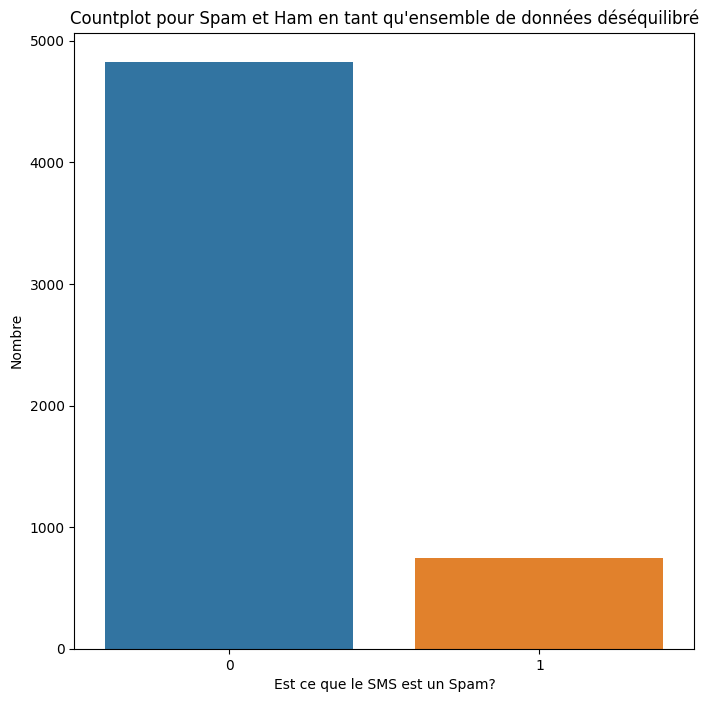

In [33]:
# Countplot pour Spam et Ham
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df_sms)
p = plt.title("Countplot pour Spam et Ham en tant qu'ensemble de données déséquilibré")
p = plt.xlabel('Est ce que le SMS est un Spam?')
p = plt.ylabel('Nombre')

_**Insight:** Se basant sur la figure ci dessus, il est évident que le **jeu de données es déséquilibré**._

# **Feature Engineering**
*   Traitement des ensembles de données déséquilibrés à l'aide du Oversampling
*   Création de nouvelles fonctionnalités, par exemple word_count, contains_currency_symbol, contains_numbers, etc.



In [36]:
# Traitement d'un ensemble de données déséquilibrées à l'aide du Oversampling
only_spam = df_sms[df_sms['label']==1]
print('Nombre de Spam: {}'.format(only_spam.shape[0]))
print('Nombre de Ham: {}'.format(df_sms.shape[0]-only_spam.shape[0]))

Nombre de Spam: 747
Nombre de Ham: 4825


In [37]:
count = int((df_sms.shape[0]-only_spam.shape[0])/only_spam.shape[0])
for i in range(0, count-1):
  df_sms = pd.concat([df_sms, only_spam])

df_sms.shape

(9307, 2)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

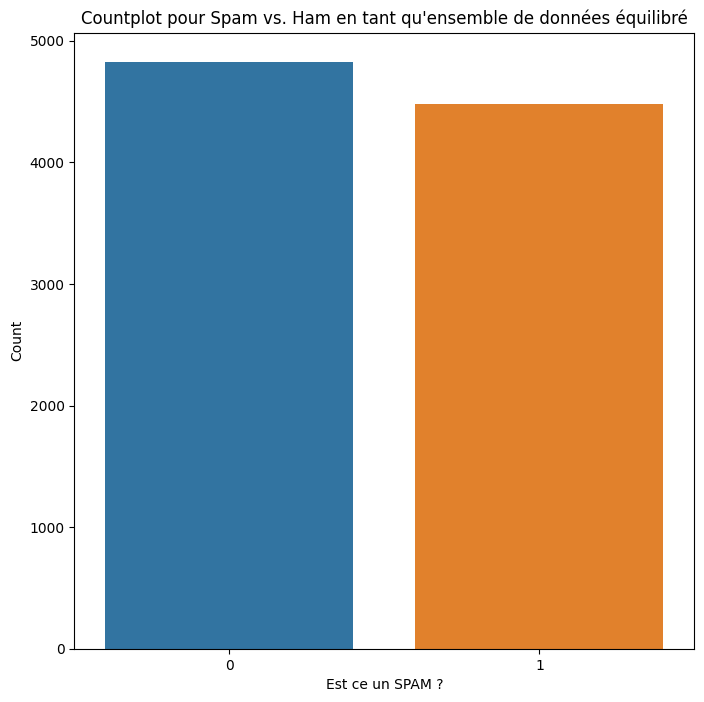

In [38]:
# Countplot for Spam vs. Ham après équilibrage
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df_sms)
p = plt.title("Countplot pour Spam vs. Ham en tant qu'ensemble de données équilibré")
p = plt.xlabel('Est ce un SPAM ?')
p = plt.ylabel('Count')

In [19]:
# Creation d'une nouvelle colonne word_count
df_sms['word_count'] = df_sms['message'].apply(lambda x: len(x.split()))

In [20]:
df_sms.head()

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


C:\Users\DELL\AppData\Local\Temp\ipykernel_7372\2146891937.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df_sms[df_sms['label']==0].word_count)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sea

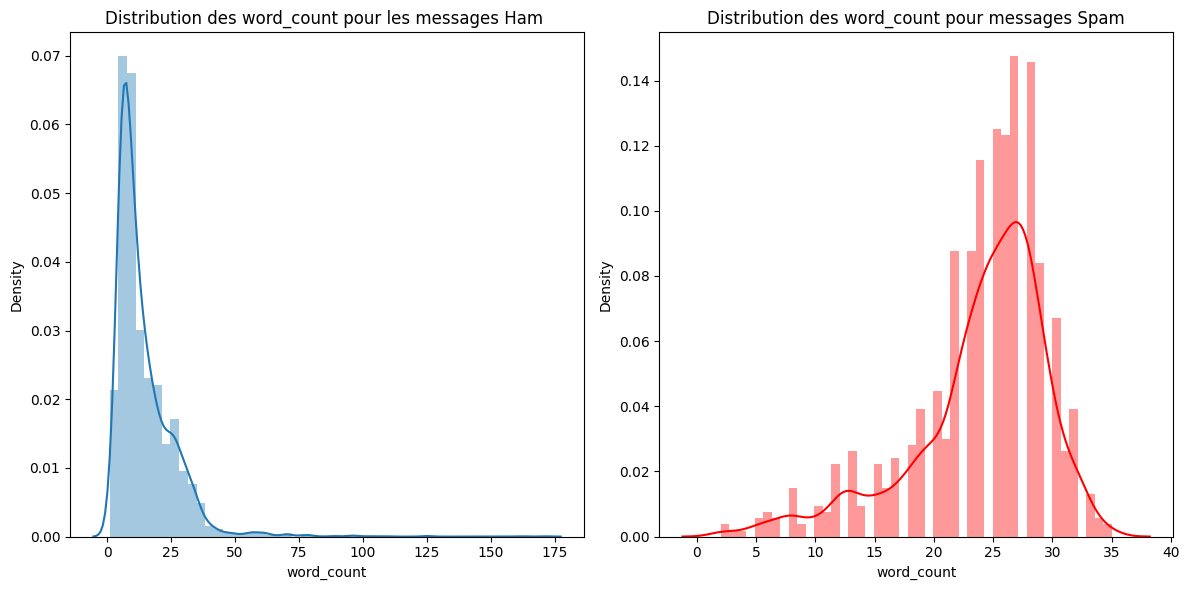

In [21]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=df_sms[df_sms['label']==0].word_count)
p = plt.title('Distribution des word_count pour les messages Ham ')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=df_sms[df_sms['label']==1].word_count, color='red')
p = plt.title('Distribution des word_count pour messages Spam')

plt.tight_layout()
plt.show()

_**le nombre de mots des messages de spam se situe entre 15 et 30 mots, alors que la majorité des messages de spam se situent en dessous de 25 mots.**._

In [39]:
# Creation d'un nouvelle colonne pour les symboles de devise
def currency(x):
  currency_symbols = ['€', '$', '¥', '£', '₹']
  for i in currency_symbols:
    if i in x:
      return 1
  return 0

df_sms['contains_currency_symbol'] = df_sms['message'].apply(currency)

In [40]:
df_sms.tail()

,label,message,contains_currency_symbol
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,0
5567,1,This is the 2nd time we have tried 2 contact u...,1


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

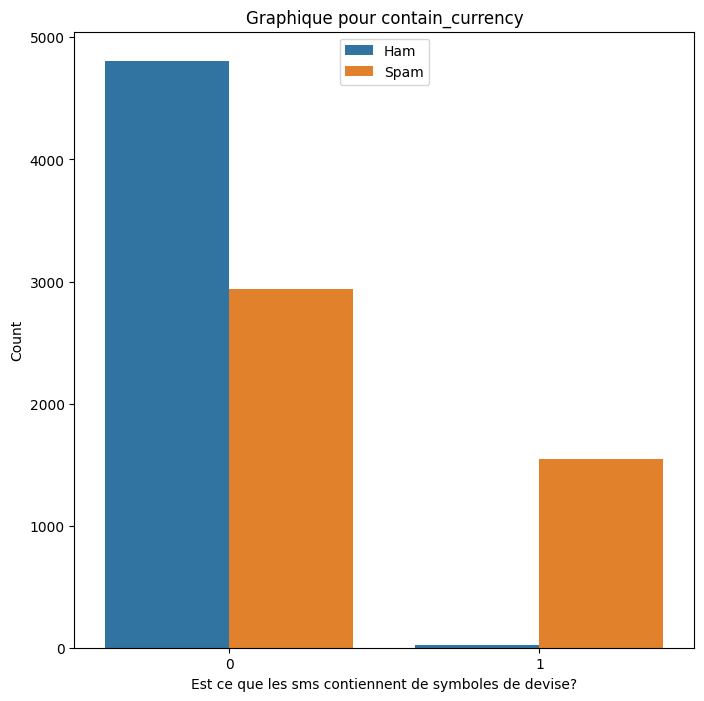

In [42]:
# Countplot for contains_currency_symbol
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbol', data=df_sms, hue='label')
p = plt.title('Graphique pour contain_currency')
p = plt.xlabel('Est ce que les sms contiennent de symboles de devise?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

_**Insight: Près d'un tiers des messages de spam contiennent des symboles monétaires**, et les symboles monétaires sont **rarement utilisés dans les messages de ham..**_

In [25]:
# Creation d'une nouvelle colonne pour les nombres 
def numbers(x):
  for i in x:
    if ord(i)>=48 and ord(i)<=57:
      return 1
  return 0

df_sms['contains_number'] = df_sms['message'].apply(numbers)

In [26]:
df_sms.head()

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

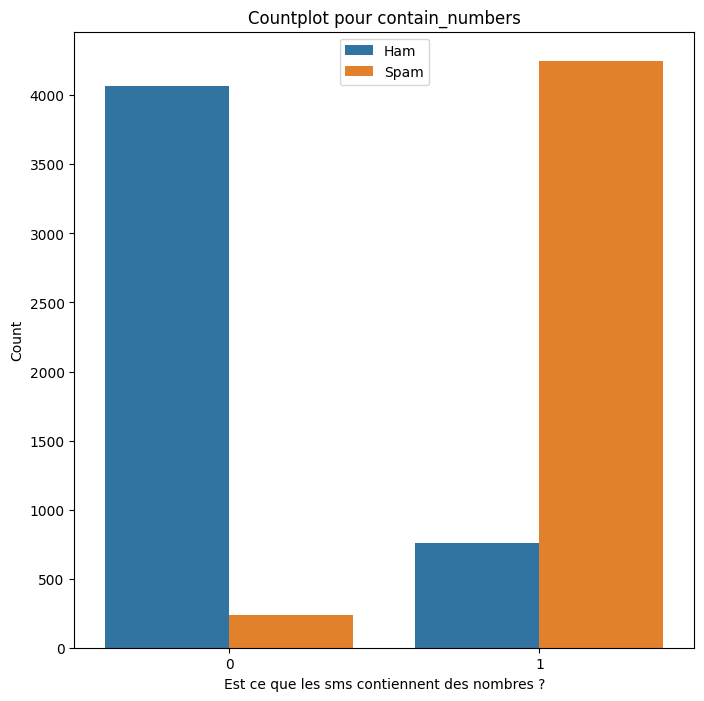

In [27]:
# Countplot for contains_number
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_number', data=df_sms, hue='label')
p = plt.title('Countplot pour contain_numbers')
p = plt.xlabel('Est ce que les sms contiennent des nombres ?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

_**Insight:** Il est évident que **la plupart des messages de spam contiennent des chiffres** et que **la majorité des messages de spam ne contiennent pas de chiffres..**_

# **Data Cleaning | Nettoyage des données**
* Suppression des caractères spéciaux et des nombres à l'aide d'expressions régulières
* Conversion de l'ensemble du message en minuscules
* Tokenisation du sms par mots
* Suppression des mots vides
* Lemmatisation des mots
* Joindre les mots lemmatisés
* Construction d'un corpus de messages

In [28]:
# Importing des librairies nécessaire pour le NLP
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df_sms.message):

  # Nettoyage des caractères spéciaux
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Convertion des caractères en miniscule
  message = message.lower()

  # Tokenisation en mot
  words = message.split()

  # Suppression des mots vides
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatisation des mots
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Jointure des mots lemmatisés
  message = ' '.join(lemmatized_words)

  # Construction d'un corpus de messages
  corpus.append(message)

In [30]:
#Affichage d'une partie du corpus
corpus[0:3]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']

In [31]:
# Creating the Bag of Words model
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df_sms['label']

# **Model Building & Evaluation | Construction et evaluation du modèle**
_**Metric: F1-Score**_

* Multiomail Naive Bayes: 0.943
* Decision Tree: 0.98
* **Random Forest (Ensemble): 0.994**
* Voting (Multinomial Naive Bayes + Decision Tree): 0.98


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modèle Naives Bayes

In [34]:
# Application du modele Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print('--- Average F1-Score pour le modele MNB: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score pour le modele MNB: 0.943 ---
Standard Deviation: 0.004


In [35]:
# Matrice de classification pour le model NB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print('--- Classification report for MNB model ---')
print(classification_report(y_test, y_pred))

--- Classification report for MNB model ---
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



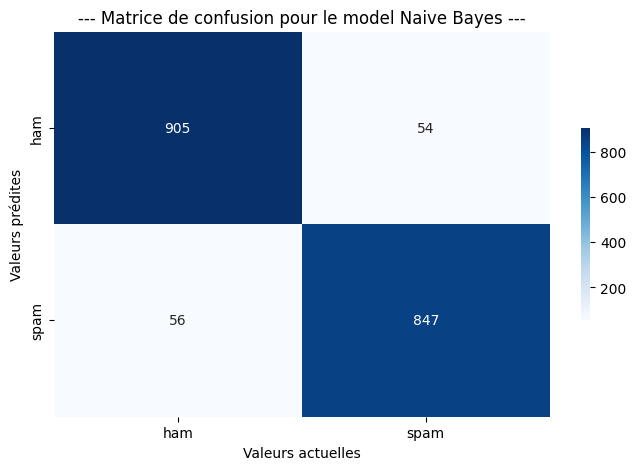

In [36]:
# Matrice de confusion our le model NB
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Valeurs actuelles')
p = plt.ylabel('Valeurs prédites')
p = plt.title('--- Matrice de confusion pour le model Naive Bayes ---')

Modèle Decision Tree

In [37]:
# Application du modele Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring='f1', cv=10)
print('--- Average F1-Score pour le modele Decision Tree : {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score pour le modele Decision Tree : 0.98 ---
Standard Deviation: 0.003


In [38]:
# Matrice de classification pour le model Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('--- Matrice de classification pour le model Decision Tree ---')
print(classification_report(y_test, y_pred))

--- Matrice de classification pour le model Decision Tree ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       959
           1       0.97      1.00      0.98       903

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



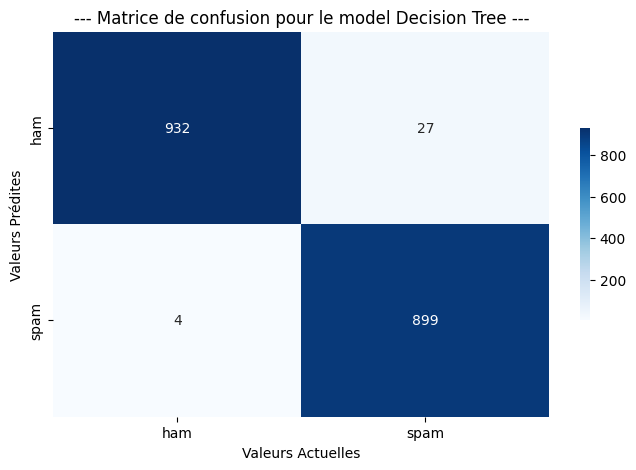

In [39]:
# Matrice de confusion pour le model Decision Tree
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Valeurs Actuelles')
p = plt.ylabel('Valeurs Prédites')
p = plt.title('--- Matrice de confusion pour le model Decision Tree ---')

Modèle Random Forest

In [40]:
# Application du modele Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
cv = cross_val_score(rf, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Random Forest model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Random Forest model: 0.994 ---
Standard Deviation: 0.002


In [41]:
# Classification report for Random Forest model
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('--- Classification report for Random Forest model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Random Forest model ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       959
           1       0.99      1.00      0.99       903

    accuracy                           0.99      1862
   macro avg       0.99      0.99      0.99      1862
weighted avg       0.99      0.99      0.99      1862



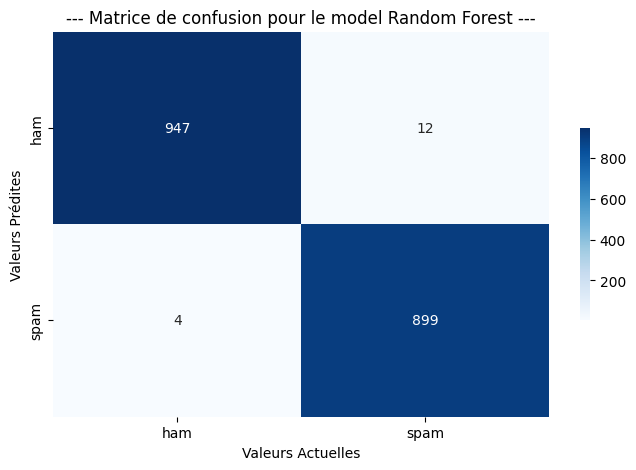

In [42]:
# Confusion matrix of Random Forest model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Valeurs Actuelles')
p = plt.ylabel('Valeurs Prédites')
p = plt.title('--- Matrice de confusion pour le model Random Forest ---')

_**Note:** Les algorithmes Decision Tree et MNB sont sélectionnés et introduits dans l'algorithme de vote pour augmenter le score F1.!_

Modèle VotingClassifier

In [43]:
# Application de Decision Tree and MNB pour VotingClassifier
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('decision_tree', dt), ('m_naive_bayes', mnb)], weights=[2,1])
cv = cross_val_score(vc, X, y, cv=10, scoring='f1')

print('--- Average F1-Score for VotingClassifier model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for VotingClassifier model: 0.98 ---
Standard Deviation: 0.003


_**Note:** L'algorithme de vote n'a pas été plus performant que l'algorithme Random Forest, c'est pourquoi **l'algorithme Random Forest est sélectionné pour prédire les résultats de cet énoncé de problème..**_


### **Entrainement du modèle**

In [44]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

### **Enregistrement du modèle Random Forest**

In [45]:
#Import de la librairie joblib pour pouvoir enregistrer le modèle
from joblib import dump

dump(rf, './Models/Random_Forest.joblib')

['./Models/Random_Forest.joblib']

# **Making Predictions | Prediction des modeles**

In [46]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [wnl.lemmatize(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = tfidf.transform([final_message]).toarray()
  return rf.predict(temp)

In [47]:
# Prediction 1 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
  print('This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a SPAM message.


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [48]:
# Prediction 2 - Casual text chat
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
  print('This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [49]:
# Prediction 3 - Transaction confirmation text message
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if predict_spam(sample_message):
  print('This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [50]:
# Predicting values 4 - Feedback message
sample_message = 'Tammy, thanks for choosing Carl’s Car Wash for your express polish. We would love to hear your thoughts on the service. Feel free to text back with any feedback. Safe driving!'

if predict_spam(sample_message):
  print('This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a SPAM message.


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
